Sentiment Analysis On Elon Musk.csv

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [2]:
pw=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Text-Mining/positive-words.txt',error_bad_lines=False)
pw

<ipython-input-2-f44e16f82bea>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pw=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Text-Mining/positive-words.txt',error_bad_lines=False)
Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [3]:
pw.columns

Index([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'], dtype='object')

In [4]:
pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'w'},inplace=True)

In [5]:
pw.columns

Index(['w'], dtype='object')

PreProcessing Data

In [6]:
pw=[w.strip() for w in pw.w] # remove both the leading and the trailing characters
pw=[w for w in pw if w] # removes empty strings, because they are considered in Python as False
pw[0:10]

[';',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."']

In [7]:
pw_text=' '.join(pw)
pw_text

'; ; Opinion Lexicon: Positive ; ; This file contains a list of POSITIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ;       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       and Comparing Opinions on the Web." Proceedings of the 14th ; ; Notes: ;    1. The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion. ;       See the paper below: ; ;       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ; ;    2. You will notice many misspelled words in the list. They are not ;       mistakes. They are included as these misspelled words appear ;       frequently in social media content. ; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; a+ abound abounds abundan

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
pw_tokens=tknzr.tokenize(pw_text)
print(pw_tokens)

[';', ';', 'Opinion', 'Lexicon', ':', 'Positive', ';', ';', 'This', 'file', 'contains', 'a', 'list', 'of', 'POSITIVE', 'opinion', 'words', '(', 'or', 'sentiment', 'words', ')', '.', ';', ';', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', ';', 'http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', ';', ';', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', '.', '"', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', '.', '"', ';', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', ';', 'and', 'Comparing', 'Opinions', 'on', 'the', 'Web', '.', '"', 'Proceedings', 'of', 'the', '14th', ';', ';', 'Notes', ':', ';', '1', '.', 'The', 'appearance', 'of', 'an', 'opinion', 'word', 'in', 'a', 'sentence', 'does', 'not', 'necessarily', ';', 'mean', 'that', 'the', 'sentence', 'expresses', 'a', 'positive', 'or', 'negative', 'opinion', '.', ';', 'See', 'the', 'paper', 'below', ':', ';', ';', 'Bing', 'Liu', '.', '"', 'Sent

In [9]:
pw_tokens_text=' '.join(pw_tokens)
pw_tokens_text

'; ; Opinion Lexicon : Positive ; ; This file contains a list of POSITIVE opinion words ( or sentiment words ) . ; ; This file and the papers can all be downloaded from ; http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; ; Minqing Hu and Bing Liu . " Mining and Summarizing Customer Reviews . " ; Proceedings of the ACM SIGKDD International Conference on Knowledge ; and Comparing Opinions on the Web . " Proceedings of the 14th ; ; Notes : ; 1 . The appearance of an opinion word in a sentence does not necessarily ; mean that the sentence expresses a positive or negative opinion . ; See the paper below : ; ; Bing Liu . " Sentiment Analysis and Subjectivity . " An chapter in ; ; 2 . You will notice many misspelled words in the list . They are not ; mistakes . They are included as these misspelled words appear ; frequently in social media content . ; ; ; ; a + abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative acco

In [10]:
no_punc_text=pw_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'  Opinion Lexicon  Positive   This file contains a list of POSITIVE opinion words  or sentiment words     This file and the papers can all be downloaded from  httpwwwcsuiceduliubFBSsentimentanalysishtml    Minqing Hu and Bing Liu   Mining and Summarizing Customer Reviews    Proceedings of the ACM SIGKDD International Conference on Knowledge  and Comparing Opinions on the Web   Proceedings of the 14th   Notes   1  The appearance of an opinion word in a sentence does not necessarily  mean that the sentence expresses a positive or negative opinion   See the paper below    Bing Liu   Sentiment Analysis and Subjectivity   An chapter in   2  You will notice many misspelled words in the list  They are not  mistakes  They are included as these misspelled words appear  frequently in social media content      a  abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished accomplishment accomplishment

In [11]:
import re
no_url_text=re.sub(r'http\S+','',no_punc_text)
no_url_text

'  Opinion Lexicon  Positive   This file contains a list of POSITIVE opinion words  or sentiment words     This file and the papers can all be downloaded from      Minqing Hu and Bing Liu   Mining and Summarizing Customer Reviews    Proceedings of the ACM SIGKDD International Conference on Knowledge  and Comparing Opinions on the Web   Proceedings of the 14th   Notes   1  The appearance of an opinion word in a sentence does not necessarily  mean that the sentence expresses a positive or negative opinion   See the paper below    Bing Liu   Sentiment Analysis and Subjectivity   An chapter in   2  You will notice many misspelled words in the list  They are not  mistakes  They are included as these misspelled words appear  frequently in social media content      a  abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished accomplishment accomplishments accurate accurately achievable achievemen

In [12]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Opinion', 'Lexicon', 'Positive', 'This', 'file', 'contains', 'a', 'list', 'of', 'POSITIVE', 'opinion', 'words', 'or', 'sentiment', 'words', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', 'and', 'Comparing', 'Opinions', 'on', 'the', 'Web', 'Proceedings', 'of', 'the', '14th', 'Notes', '1', 'The', 'appearance', 'of', 'an', 'opinion', 'word', 'in', 'a', 'sentence', 'does', 'not', 'necessarily', 'mean', 'that', 'the', 'sentence', 'expresses', 'a', 'positive', 'or', 'negative', 'opinion', 'See', 'the', 'paper', 'below', 'Bing', 'Liu', 'Sentiment', 'Analysis', 'and', 'Subjectivity', 'An', 'chapter', 'in', '2', 'You', 'will', 'notice', 'many', 'misspelled', 'words', 'in', 'the', 'list', 'They', 'are', 'not', 'mistakes', 'They', 'are', 'included', 'as', 'these', 'misspelle

In [14]:
len(text_tokens)

2124

In [15]:
#remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Opinion', 'Lexicon', 'Positive', 'This', 'file', 'contains', 'list', 'POSITIVE', 'opinion', 'words', 'sentiment', 'words', 'This', 'file', 'papers', 'downloaded', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'ACM', 'SIGKDD', 'International', 'Conference', 'Knowledge', 'Comparing', 'Opinions', 'Web', 'Proceedings', '14th', 'Notes', '1', 'The', 'appearance', 'opinion', 'word', 'sentence', 'necessarily', 'mean', 'sentence', 'expresses', 'positive', 'negative', 'opinion', 'See', 'paper', 'Bing', 'Liu', 'Sentiment', 'Analysis', 'Subjectivity', 'An', 'chapter', '2', 'You', 'notice', 'many', 'misspelled', 'words', 'list', 'They', 'mistakes', 'They', 'included', 'misspelled', 'words', 'appear', 'frequently', 'social', 'media', 'content', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomp

In [16]:
#Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'agreeableness', 'agreeably', 'allaround', 'alluring', 'alluringly', 'altruistic', 'altruistically', 'amaze', 'amazed', 'amazement', 'amazes', 'amazing', 'amazingly', 'ambitious', 'ambitiously', 'ameliorate', 'amenable', 'amenity', 'amiability', 'amiabily', 'amiable', 'amicability', 'amicable', 'amicably', 'amity', 'ample', 'amply', 'amuse'

In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['adapt', 'adapt', 'adequ', 'adjust', 'admir', 'admir', 'admir', 'admir', 'admir', 'admir', 'admiringli', 'ador', 'ador', 'ador', 'ador', 'ador', 'adoringli', 'adroit', 'adroitli', 'adul', 'adul', 'adulatori', 'advanc', 'advantag', 'advantag', 'advantag', 'advantag', 'adventuresom', 'adventur', 'advoc', 'advoc', 'advoc', 'affabl', 'affabl', 'affabl', 'affect', 'affect', 'affection', 'affin', 'affirm', 'affirm', 'affirm', 'affluenc', 'affluent', 'afford', 'afford', 'afford', 'aford', 'agil', 'agil', 'agil', 'agreeabl', 'agreeabl', 'agreeabl', 'allaround', 'allur', 'alluringli', 'altruist', 'altruist', 'amaz', 'amaz', 'amaz', 'amaz', 'amaz', 'amazingli', 'ambiti', 'ambiti', 'amelior', 'amen', 'amen', 'amiabl', 'amiabili', 'amiabl', 'amic', 'amic', 'amic', 'amiti', 'ampl', 'ampli', 'amus', 'amus', 'amusingli', 'angel', 'angel', 'apotheosi', 'appeal', 'appeal', 'applaud', 'appreci', 'appreci', 'appreci', 'appreci', 'appreci', 'appreci', 'appropri', 'approv', 'approv', 'ardent', 'ardent', '

In [18]:
#Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

opinion lexicon positive this file contains list positive opinion words sentiment words this file papers downloaded minqing hu bing liu mining summarizing customer reviews proceedings acm sigkdd international conference knowledge comparing opinions web proceedings 14th notes 1 the appearance opinion word sentence necessarily mean sentence expresses positive negative opinion see paper bing liu sentiment analysis subjectivity an chapter 2 you notice many misspelled words list they mistakes they included misspelled words appear frequently social media content abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished accomplishment accomplishments accurate accurately achievable achievement achievements achievible acumen adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admiring admiringly adorable adore adored adorer adoring adoringly adroit adroitly adulate 

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['opinion', 'lexicon', 'positive', 'this', 'file', 'contain', 'list', 'positive', 'opinion', 'word', 'sentiment', 'word', 'this', 'file', 'paper', 'download', 'minqe', 'hu', 'bing', 'liu', 'mining', 'summarize', 'customer', 'review', 'proceeding', 'acm', 'sigkdd', 'international', 'conference', 'knowledge', 'compare', 'opinion', 'web', 'proceeding', '14th', 'note', '1', 'the', 'appearance', 'opinion', 'word', 'sentence', 'necessarily', 'mean', 'sentence', 'express', 'positive', 'negative', 'opinion', 'see', 'paper', 'bing', 'liu', 'sentiment', 'analysis', 'subjectivity', 'an', 'chapter', '2', 'you', 'notice', 'many', 'misspelled', 'word', 'list', 'they', 'mistake', 'they', 'include', 'misspelled', 'word', 'appear', 'frequently', 'social', 'medium', 'content', 'abound', 'abound', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaim', 'acclamation', 'accolade', 'accolade', 'accommodative', 'accomodative', 'accomplish', 'accomplish', 'accomplishment', 'accomplishment',

In [20]:
clean_pw=' '.join(lemmas)
clean_pw

'opinion lexicon positive this file contain list positive opinion word sentiment word this file paper download minqe hu bing liu mining summarize customer review proceeding acm sigkdd international conference knowledge compare opinion web proceeding 14th note 1 the appearance opinion word sentence necessarily mean sentence express positive negative opinion see paper bing liu sentiment analysis subjectivity an chapter 2 you notice many misspelled word list they mistake they include misspelled word appear frequently social medium content abound abound abundance abundant accessable accessible acclaim acclaim acclamation accolade accolade accommodative accomodative accomplish accomplish accomplishment accomplishment accurate accurately achievable achievement achievement achievible acuman adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admire admiringly adorable adore adore adorer adore adoringly adroit adroitly adulate adulation adulatory advanced advan

Feature Extraction

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
pwcv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'opinion': 1098, 'lexicon': 963, 'positive': 1188, 'this': 1604, 'file': 643, 'contain': 306, 'list': 973, 'word': 1783, 'sentiment': 1427, 'paper': 1129, 'download': 409, 'minqe': 1054, 'hu': 822, 'bing': 178, 'liu': 974, 'mining': 1053, 'summarize': 1549, 'customer': 345, 'review': 1359, 'proceeding': 1216, 'acm': 18, 'sigkdd': 1436, 'international': 901, 'conference': 293, 'knowledge': 946, 'compare': 279, 'web': 1735, '14th': 0, 'note': 1086, 'the': 1601, 'appearance': 101, 'sentence': 1426, 'necessarily': 1073, 'mean': 1033, 'express': 570, 'negative': 1074, 'see': 1413, 'analysis': 95, 'subjectivity': 1536, 'an': 94, 'chapter': 232, 'you': 1793, 'notice': 1088, 'many': 1018, 'misspelled': 1059, 'they': 1602, 'mistake': 1060, 'include': 862, 'appear': 100, 'frequently': 678, 'social': 1466, 'medium': 1035, 'content': 307, 'abound': 1, 'abundance': 2, 'abundant': 3, 'accessable': 4, 'accessible': 5, 'acclaim': 6, 'acclamation': 7, 'accolade': 8, 'accommodative': 9, 'accomodative':

In [23]:
print(cv.get_feature_names_out()[100:200])

['appear' 'appearance' 'applaud' 'appreciable' 'appreciate' 'appreciative'
 'appreciatively' 'appropriate' 'approval' 'approve' 'ardent' 'ardently'
 'ardor' 'articulate' 'aspiration' 'aspire' 'assurance' 'assure'
 'assuredly' 'astonish' 'astonishing' 'astonishingly' 'astonishment'
 'astound' 'astounding' 'astoundingly' 'astutely' 'attentive' 'attraction'
 'attractive' 'attractively' 'attune' 'audible' 'audibly' 'auspicious'
 'authentic' 'authoritative' 'autonomous' 'available' 'aver' 'avid'
 'avidly' 'award' 'awe' 'awed' 'awesome' 'awesomely' 'awesomeness'
 'awestruck' 'awsome' 'backbone' 'balanced' 'bargain' 'beauteous'
 'beautiful' 'beautifullly' 'beautifully' 'beautify' 'beauty' 'beckon'
 'believable' 'believeable' 'beloved' 'benefactor' 'beneficent'
 'beneficial' 'beneficially' 'beneficiary' 'benefit' 'benevolence'
 'benevolent' 'benifit' 'bestknown' 'bestperforme' 'bestselle'
 'betterknown' 'betterthanexpecte' 'beutifully' 'bing' 'blameless' 'bless'
 'blessing' 'bliss' 'blissful' 

In [24]:
print(pwcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(pwcv.toarray().shape)

(2080, 1799)


Generate Word Cloud

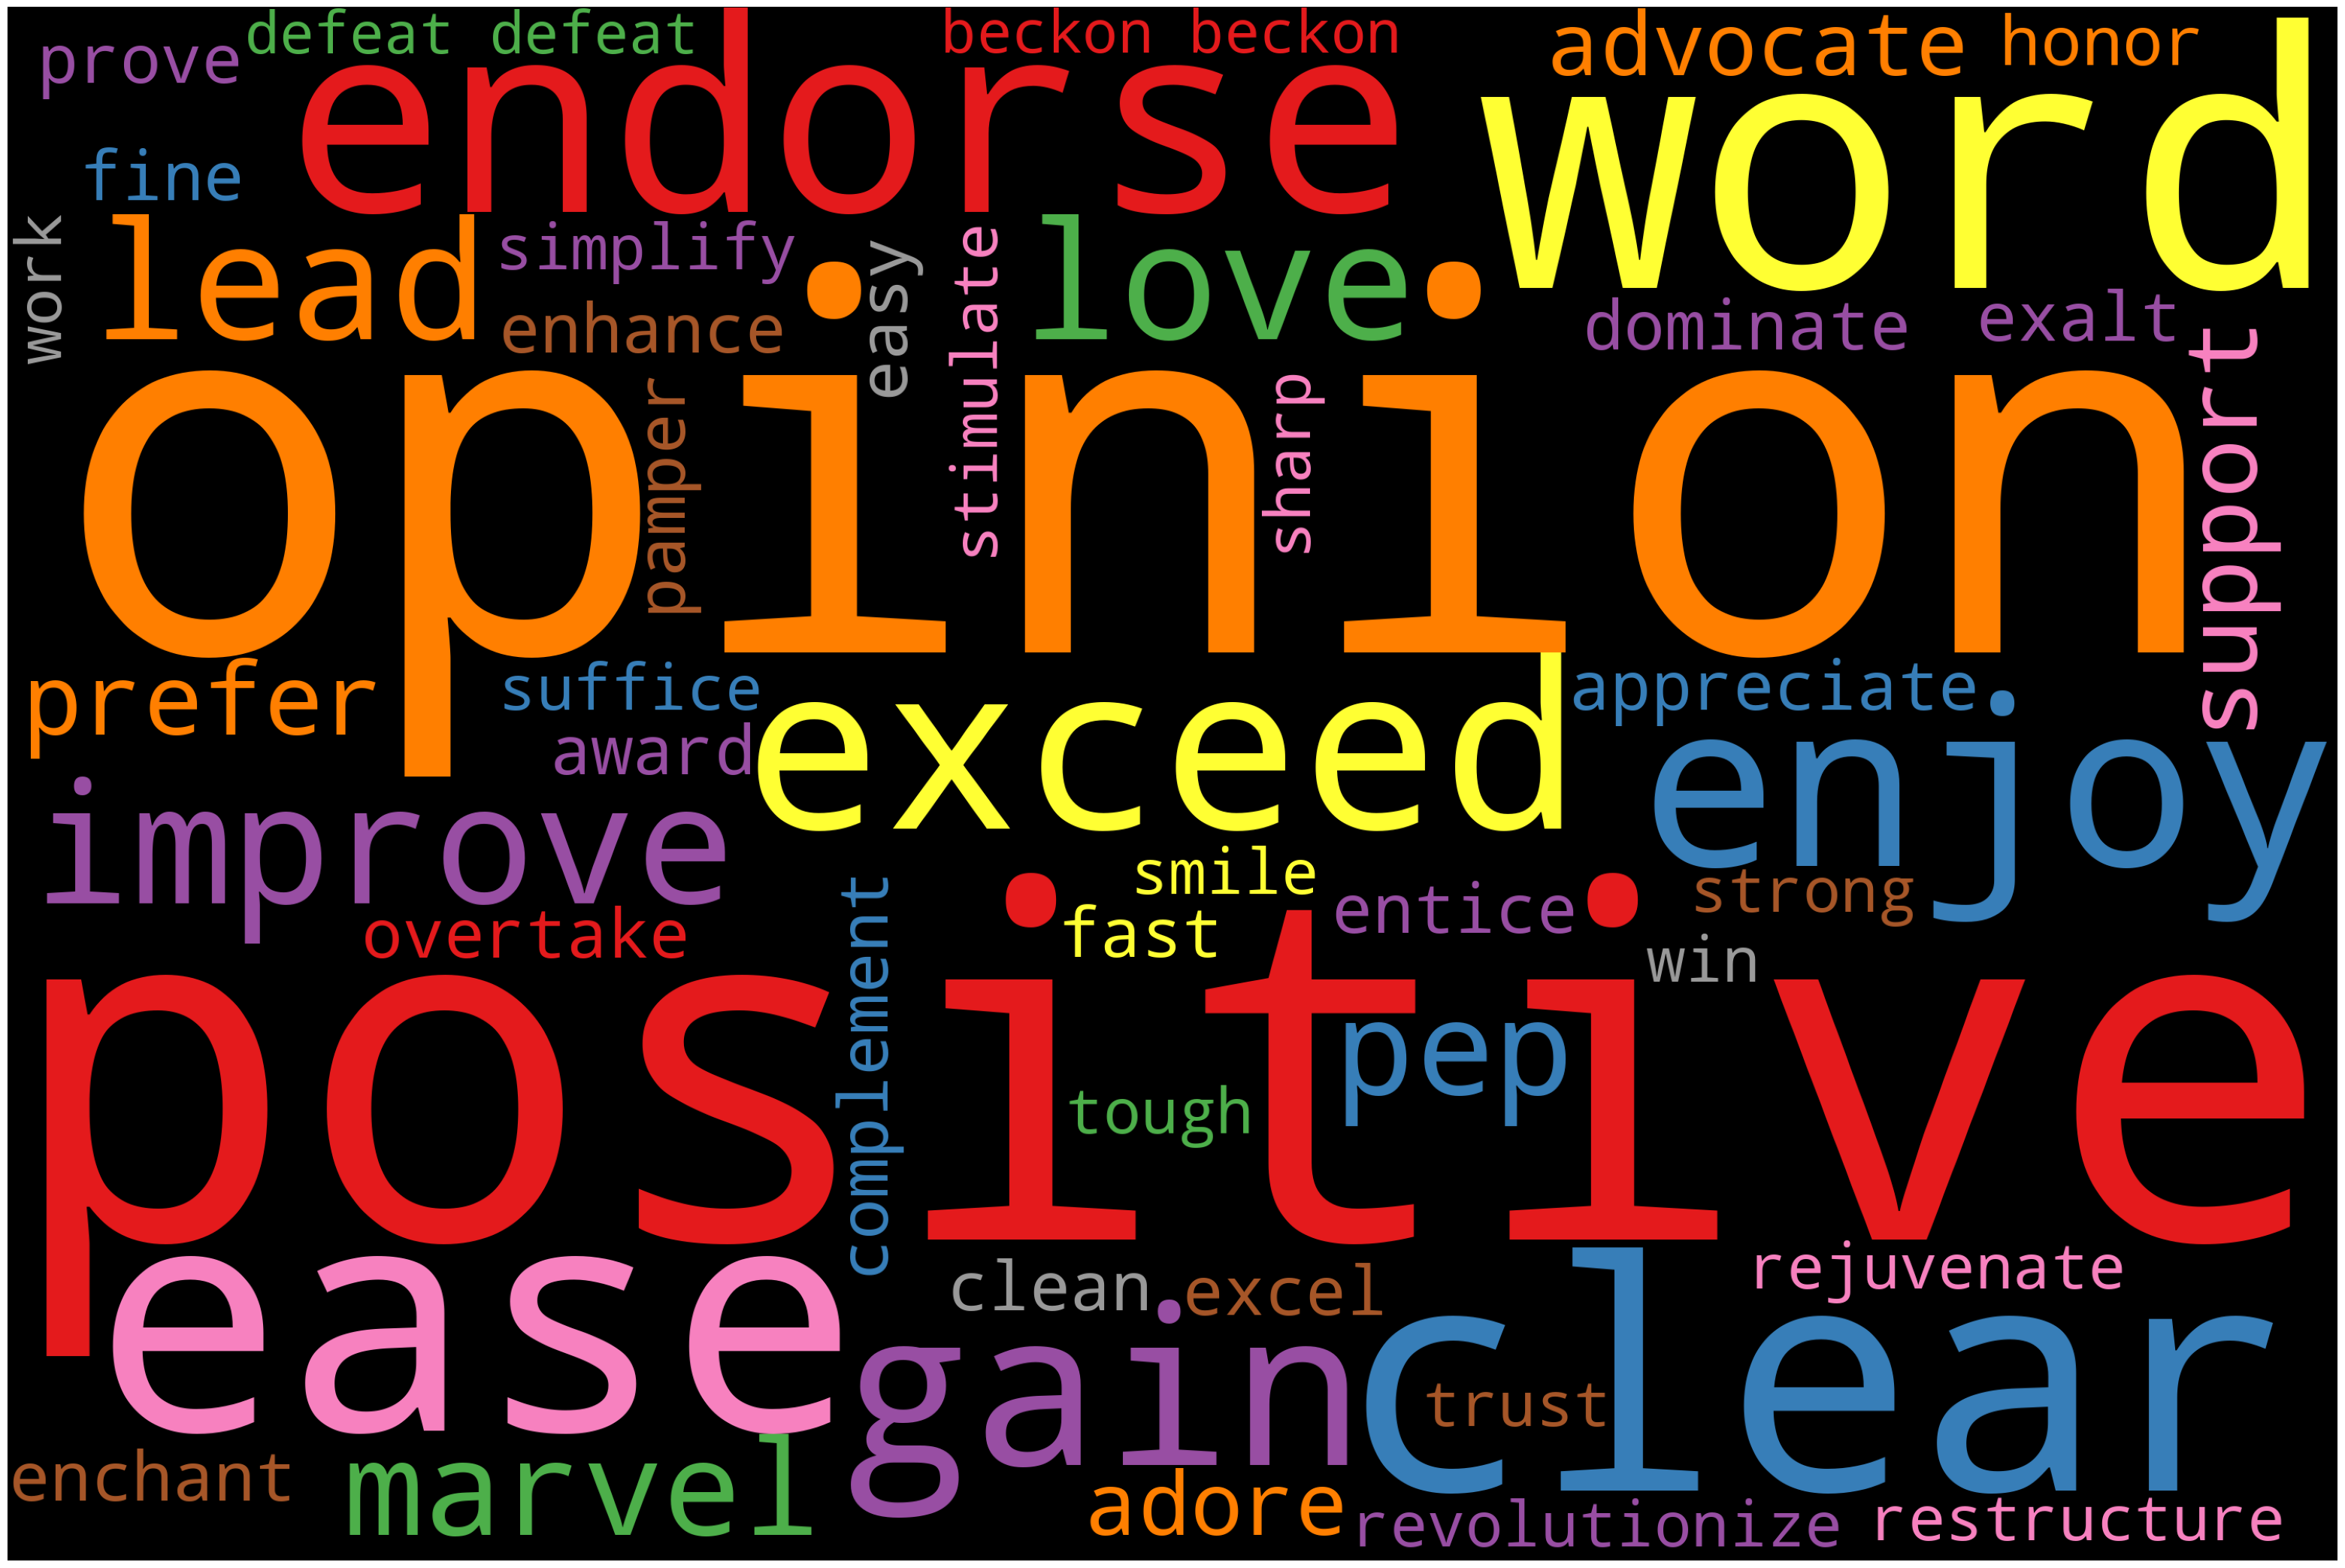

In [26]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_pw)
plot_cloud(wordcloud)

Named Entity Recognition

In [27]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_pw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

Emotion Mining(Sentiment Analysis)

In [28]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(pw))
sentences

['; ; Opinion Lexicon: Positive ; ; This file contains a list of POSITIVE opinion words (or sentiment words).',
 '; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; ;   Minqing Hu and Bing Liu.',
 '"Mining and Summarizing Customer Reviews."',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       and Comparing Opinions on the Web."',
 'Proceedings of the 14th ; ; Notes: ;    1.',
 'The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper below: ; ;       Bing Liu.',
 '"Sentiment Analysis and Subjectivity."',
 'An chapter in ; ;    2.',
 'You will notice many misspelled words in the list.',
 'They are not ;       mistakes.',
 'They are included as these misspelled words appear ;       frequently in social media content.',
 '; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

In [29]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,; ; Opinion Lexicon: Positive ; ; This file co...
1,; ; This file and the papers can all be downlo...
2,"""Mining and Summarizing Customer Reviews."""
3,; Proceedings of the ACM SIGKDD Internat...
4,Proceedings of the 14th ; ; Notes: ; 1.
5,The appearance of an opinion word in a sentenc...
6,; See the paper below: ; ; Bing Liu.
7,"""Sentiment Analysis and Subjectivity."""
8,An chapter in ; ; 2.
9,You will notice many misspelled words in the l...


In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def calculate_sentiment(text):
    nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores

text = 'great'
sentiment_scores = calculate_sentiment(text)
print(sentiment_scores)


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [31]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is alre

0     {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.143, 'neu': 0.618, 'pos': 0.239, 'co...
6     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'comp...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.011, 'neu': 0.355, 'pos': 0.634, 'co...
Name: sentiment_value, dtype: object